# load saved episode data and test plotting functions

Load the necessary library

In [1]:
import numpy as np
import os

import pandas as pd

from plot_experiment import plot_episode_data_virtual
from eval_metrics import success_rate_from_distances

In [2]:
load_dir = "../evaluations/fail_penalty/"
experiments = os.listdir(load_dir)

# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

In [3]:
print(all_actions[0].shape)

(500, 9)


In [4]:
print(len(all_actions))
for i in range(len(all_actions)):
    all_actions[i].drop(columns=["Unnamed: 0"], inplace=True)

all_actions[0].head()

9


,0,1,2,3,4,5,6,7
0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0
4,0,0,0,0,1,0,1,0


In [5]:
all_actions[2].shape

(500, 8)

<class 'numpy.ndarray'>


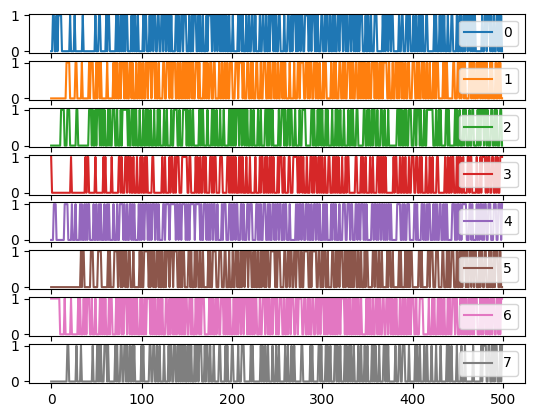

In [12]:

print(type(all_actions[0].plot(subplots=True)))

(9, 8)
    T1   T2   T3   T4   T5   T6   T7   T8
0  207  210  191  173  243  216  239  144
1  214  211  182  172  274  219  221  152
2  208  210  209  169  239  215  218  142
3  207  210  191  173  243  216  239  144
4  214  211  182  172  274  219  221  152
5  208  210  209  169  239  215  218  142
6  211  213  203  193  219  153  236  175
7  207  197  193  184  203  146  236  175
8    0    0    0    0    0    0    0    0


<BarContainer object of 8 artists>

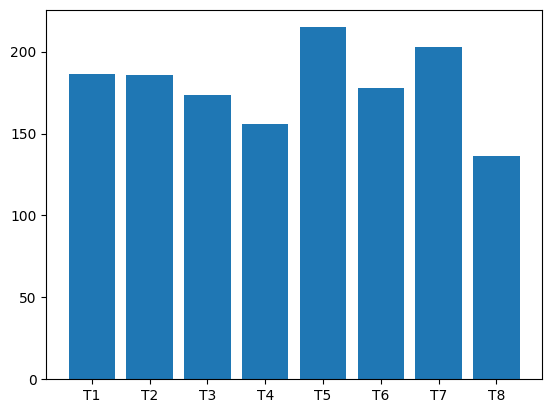

In [101]:
freq = pd.DataFrame(data=np.array([all_actions[i].sum() for i in range(len(all_actions))]), 
                    columns=[f'T{i+1}' for i in range(8)])

mean_freq = freq.mean()
mean_freq.shape
plt.bar(mean_freq.index, mean_freq.values)


In [60]:
all_actions[0].describe()

,0,1,2,3,4,5,6,7
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,0.414000,0.420000,0.382000,0.34600,0.486000,0.432000,0.478000,0.288000
std,0.493042,0.494053,0.486363,0.47617,0.500305,0.495851,0.500016,0.453285
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
